In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, zero_one_loss, classification_report
from sklearn.model_selection import train_test_split
from imutils import paths
import matplotlib.pyplot as plt
import seaborn as sb
import splitfolders
import cv2
import random

In [2]:
inputFolder = 'C:\\Users\\pc\\brain'
outputFolder = 'C:\\Users\\pc\\image_dataset_(Brain)'

In [3]:
splitfolders.ratio(inputFolder, outputFolder, seed = 44, ratio = (0.8, 0.0, 0.2))

In [4]:
imgPaths = list(paths.list_images(outputFolder))
print(imgPaths[0].split('\\'))

random.shuffle(imgPaths)

classes = [] # classes = ['brain_menin', 'brain_glioma', 'brain_pituitary', 'no_tumor']
for imgPath in imgPaths:
  className = imgPath.split('\\')[-2]

  if className not in classes:
    classes.append(className)

print(classes)

X_train = []
y_train = []

X_test = []
y_test = []

IMGSIZE = 128
img_names = []

for imgPath in imgPaths:
  trainOrTest = imgPath.split('\\')[-3]
  className = imgPath.split('\\')[-2]

  img = cv2.imread(imgPath) #cv2.IMREAD_GRAYSCALE
  img = cv2.resize(img, (IMGSIZE,IMGSIZE))

  if trainOrTest == 'train':
    X_train.append(img)
    y_train.append(classes.index(className))
    img_names.append(imgPath.split('\\')[-1])

  elif trainOrTest == 'test':
    X_test.append(img)
    y_test.append(classes.index(className))

print(len(X_train), len(y_train))

['C:', 'Users', 'pc', 'image_dataset_(Brain)', 'image_dataset_(Brain)', 'test', 'brain_glioma', 'brain_glioma_0001.jpg']
['brain_menin', 'brain_glioma', 'brain_pituitary', 'no_tumor']
16000 16000


In [5]:
df = pd.DataFrame({
    'File Name' : img_names,
    'Category' : y_train #y
})

print(classes.index('brain_menin'))
print(classes.index('brain_glioma'))
print(classes.index('brain_pituitary'))
print(classes.index('no_tumor'))

print(classes)
df.head()

0
1
2
3
['brain_menin', 'brain_glioma', 'brain_pituitary', 'no_tumor']


,File Name,Category
0,brain_menin_1693.jpg,0
1,brain_tumor_3625.jpg,2
2,Tr-no_0841.jpg,3
3,brain_tumor_4804.jpg,2
4,no332.jpg,3


<Axes: ylabel='count'>

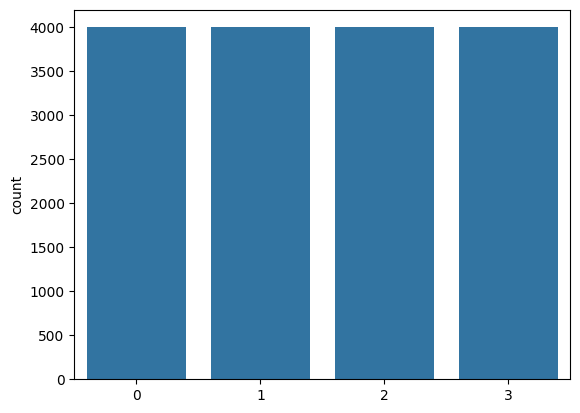

In [6]:
sb.countplot(x = y_train)

<Axes: ylabel='count'>

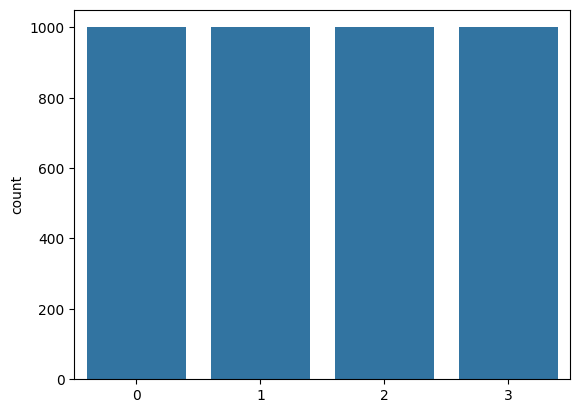

In [7]:
sb.countplot(x = y_test)

In [8]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16000, 128, 128, 3) (16000,)
(4000, 128, 128, 3) (4000,)


In [10]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (IMGSIZE, IMGSIZE, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True) 
results = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 25, batch_size = 32, callbacks = [early_stopping])  
# val_loss, val_acc = model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)

model.summary()

C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 204s 400ms/step - accuracy: 0.5267 - loss: 1.1155 - val_accuracy: 0.6653 - val_loss: 0.7691
Epoch 2/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 197s 395ms/step - accuracy: 0.8174 - loss: 0.4814 - val_accuracy: 0.9025 - val_loss: 0.2622
Epoch 3/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 196s 391ms/step - accuracy: 0.8755 - loss: 0.3295 - val_accuracy: 0.9185 - val_loss: 0.2489
Epoch 4/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 197s 394ms/step - accuracy: 0.9079 - loss: 0.2551 - val_accuracy: 0.9485 - val_loss: 0.1519
Epoch 5/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 196s 391ms/step - accuracy: 0.9254 - loss: 0.2109 - val_accuracy: 0.9350 - val_loss: 0.1633
Epoch 6/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 194s 388ms/step - accuracy: 0.9388 - loss: 0.1684 - val_accuracy: 0.9523 - val_loss: 0.1303
Epoch 7/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 196s 391ms/step - accuracy: 0.9450 - loss: 0.1543 - val_accuracy: 0.9210 - val_loss: 0.2188
Epoch 8/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 196s 391ms/step - accuracy: 0.9494 -

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,368,398 (31.92 MB)

 Trainable params: 2,789,444 (10.64 MB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 5,578,890 (21.28 MB)

In [11]:
classes = ['brain_menin', 'brain_glioma', 'brain_pituitary', 'no_tumor']
IMGSIZE = 128

In [12]:
model.save('C:\\Users\\pc\\model_image_(Brain).h5')
loaded_model = load_model('C:\\Users\\pc\\model_image_(Brain).h5')

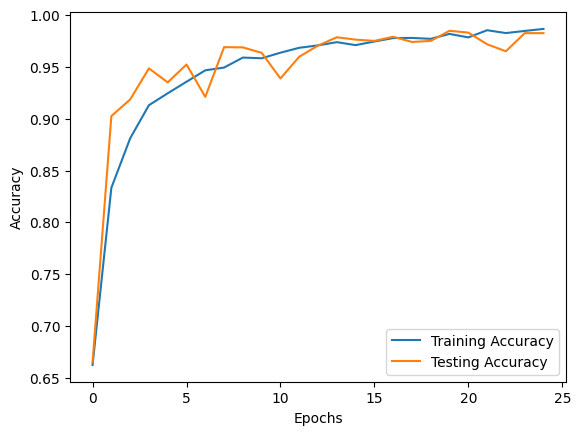

In [13]:
plt.plot(results.history['accuracy'], label = 'Training Accuracy')
plt.plot(results.history['val_accuracy'], label = 'Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

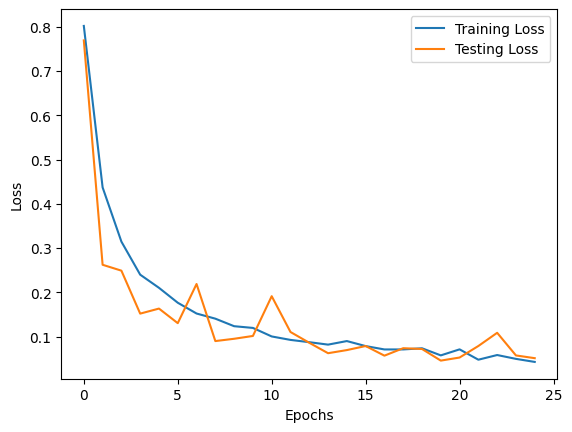

In [14]:
plt.plot(results.history['loss'], label = 'Training Loss')
plt.plot(results.history['val_loss'], label = 'Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
print(classes)
print(y_test[:25], '\n')
print(y_pred[:25], '\n')

predict = []
for i in range(len(y_pred)):
  predict.append(np.argmax(y_pred[i]))

print(predict[:25], '\n')

cm = confusion_matrix(y_test, predict)
print(cm, '\n')

zol = zero_one_loss(y_test, predict, normalize = False)
print(zol, '\n')

cr = classification_report(y_test, predict)
print(cr)

['brain_menin', 'brain_glioma', 'brain_pituitary', 'no_tumor']
[0 1 2 0 1 0 3 3 1 0 2 0 1 1 2 2 1 3 1 3 1 2 0 1 0] 

[[9.99999762e-01 2.67586302e-07 9.52219466e-12 5.18170023e-16]
 [1.20270333e-05 9.99987841e-01 3.77241527e-09 1.38320374e-07]
 [2.95110024e-03 1.49620582e-05 9.97018456e-01 1.54627760e-05]
 [9.86016929e-01 1.39652286e-02 1.76915455e-05 1.24586251e-07]
 [1.70444181e-07 9.99999881e-01 2.17012880e-10 8.95503116e-10]
 [9.54197407e-01 6.64829940e-06 4.57949229e-02 1.00577358e-06]
 [5.08334245e-15 1.12829865e-18 4.39386568e-15 1.00000000e+00]
 [2.91550035e-31 1.44532522e-33 2.10808286e-27 1.00000000e+00]
 [5.22170573e-08 1.00000000e+00 7.40183349e-12 2.05611875e-10]
 [9.99763429e-01 2.25615338e-04 1.08506874e-05 1.19997281e-07]
 [2.45592761e-04 5.19641183e-08 9.99754369e-01 7.62374918e-14]
 [9.98687685e-01 1.23999221e-03 7.18141819e-05 4.96050461e-07]
 [5.07561344e-06 9.99994874e-01 1.61724287e-08 2.97066407e-08]
 [1.23813766e-06 9.99998808e-01 7.98793087e-10 2.61622208e-08]
 

<Figure size 500x500 with 0 Axes>

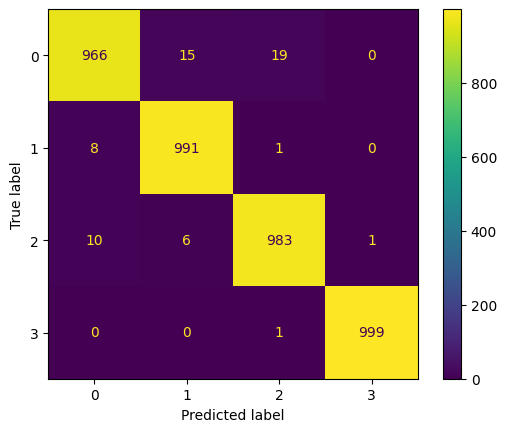

In [16]:
plt.figure(figsize = (5,5))
ConfusionMatrixDisplay(cm).plot()
plt.show()

tf.Tensor([[4.4729648e-05 9.9995267e-01 9.5756968e-07 1.6504063e-06]], shape=(1, 4), dtype=float32)
['brain_menin', 'brain_glioma', 'brain_pituitary', 'no_tumor']


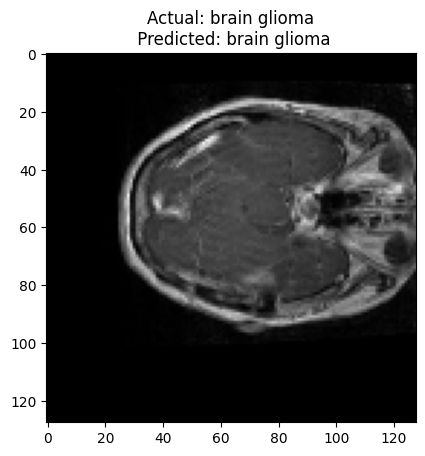

In [32]:
test_img_path = 'C:\\Users\\pc\\image_dataset_(Brain)\\image_dataset_(Brain)\\test\\brain_glioma\\brain_glioma_0032.jpg'
test_img = cv2.imread(test_img_path)
test_img = cv2.resize(test_img, (IMGSIZE,IMGSIZE))

plt.imshow(test_img)

test_img = test_img[tf.newaxis, ...]
test_predict = loaded_model(test_img)
# test_predict = model.predict(test_img)

str1 = test_img_path.split('\\')[-1].split('_')[0]
str2 = test_img_path.split('\\')[-1].split('_')[1]
str3 = classes[np.argmax(test_predict)].split('_')[0] + ' ' + classes[np.argmax(test_predict)].split('_')[1]

plt.title('Actual: ' + str1 + ' ' + str2 + '\n Predicted: ' + str3)

print(test_predict)
print(classes)
plt.show()